# Быстрый корреляционный алгоритм

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_0 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1 ,0]]

num_1 = [[0, 0, 1, 0, 0],
         [0, 1, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 1, 1, 0]]

num_2 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [1, 1, 1, 1, 1]]

num_3 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 0, 0, 1], 
         [0, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0]]

num_4 = [[1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1]]

num_5 = [[1, 1, 1, 1, 1],
         [1, 0, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [1, 1, 1, 1, 0]]

num_6 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 0],
         [1, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0]]

num_7 = [[1, 1, 1, 1, 1],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 1, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0],
         [0, 0, 1, 0, 0]]

num_8 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1 ,0]]

num_9 = [[0, 1, 1, 1, 0],
         [1, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1, 0],
         [0, 0, 0, 0, 1],
         [0, 0, 0, 0, 1],
         [1, 0, 0, 0, 1],
         [0, 1, 1, 1 ,0]]        

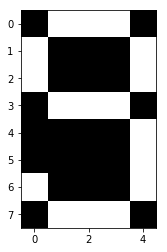

In [17]:
templates = [num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9]

for element in templates:
    plt.imshow(element, cmap='gray')

In [3]:
input_num = [[1, 1, 1, 1, 0],
             [1, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [0, 1, 1, 1, 1],
             [0, 0, 0, 0, 1],
             [0, 0, 0, 0, 1],
             [1, 0, 0, 0, 1],
             [1, 1, 1, 1, 0]]

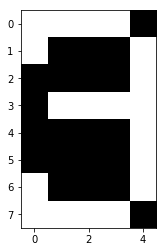

In [18]:
plt.imshow(input_num, cmap='gray')

In [10]:
len(input_num)

8

In [13]:
len(input_num[0])

5

In [5]:
# для каждого шаблона считаем число +1 и -1, затем вычисляем их сумму,
# деленную на количество едениц в шаблоне
# после этого относим входное изображение к шаблону с наибольшей суммой

# массив, в котором рассчитывается сумма при сопоставлении входного изображения
# и шаблона
dif = [0]*10
number = [num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9]

# цикл по строкам изображения
for i in range(len(input_num)):
    # цикл по столбцам изображения
    for j in range(len(input_num[0])):
        # если пиксель вх изображения = 1 и на шаблоне 1:
        # прибавляем единицу
        # иначе: вычитаем единицу
        if (input_num[i][j] == 1):
            for n in range(10):
                if (number[n][i][j] == 0):
                    dif[n] = dif[n] - 1
                if (number[n][i][j] == 1):
                    dif[n] = dif[n] + 1
                    
# делим значения суммы на количество едениц в шаблоне
for n in range(10):
    dif[n] = dif[n] / sum([sum(el) for el in number[n]])
        
diff = np.array(dif)        
print(diff.argmax())        

9


In [9]:
sum([sum(el) for el in input_num])



19